# Investigate a Dataset (No show appointments)


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling (Gathering,Assessing,Cleaning)</a></li>
<li><a href="#eda">Exploratory Data Analysis "EDA"</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">limitation</a></li>
</ul>

<a id='intro'></a>
# Introduction

### in this project we will invistigate a dataset for 100k medical appointments in Brazil.

#### this data is based on whether the patients showed up on the appointment that they booked or not with some specific data for each patient such as thier medical reports and diseases

- <b>patientId</b>=Identification of a patient
- <b>AppointmentID</b>= Identification of each appointment
- <b>Gender</b>= Male or Female
- <b>ScheduledDay</b>= The day of the actual appointment
- <b>AppointmentDay</b>= The day the patient or someone  called to book an appointment
- <b>Age</b>= Age of the patient
- <b>Neighbourhood</b>= the hospital where the appointment takes place.
- <b>Scholarship</b>= If the person receives welfare assistance (True of False)
- <b>Hipertension</b>= True or False
- <b>Diabetes</b>= True or False
- <b>Alcoholism</b> = True or False
- <b>Handicap</b> = True or False
- <b>SMS -received</b>= messages sent to the patient to verify thier appointments
- <b>No-show</b>= with values True or False.
<br>


## Questions for the analysis

#### 1.what is the ratio between the patient who showed up and those who didn't?

#### 2.Is sending an sms made a progress for showing up on the appointments?

#### 3. Is there a correlation between the neighbourhood of the hospital and showing up on thier appointments?

#### 4.Does females happens to show up on  thier appointments more than males?

#### 5.Does the age matter on showing up?

#### 6.Is enrolling in brazilllian welfare program has raised number of patients who showed up?

#### 7.Is having a chronic disease affect on not showing up on the appointments?

#### 8.Is being an alcoholic affects the missed appointments percentage?

#### 9.What factors are important for us to know in order to predict if a patient will show up for thier appointments?

### Importing libraries

#### We will begin with loading some important libraries to help us coding

In [1]:
#importing libraries,modules and packages we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>

# Data Wrangling (Gathering,Assessing,Cleaning)

#### As the data has been collected already we don't need to make gathering process on it

## Reading The Data from the File

In [2]:
#reading the csv file
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## Data Assessing

#### By knowing the shape and getting more information about our dataset we can start cleaning our data

In [3]:
#check for the dataset
df.shape

(110527, 14)

In [4]:
#gettig the first few rows to know more about our data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#getting more informations about the dataset by info for each column
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data Cleaning 

### Duplicated rows
#### We check if there were any duplicated rows and we will want to delete/drop those rows for avoiding any misleading outputs

In [6]:
#getting the number of duplicated rows in our dataset
df.duplicated().sum()

0

### Missing values 'NaN'
#### check for any missing values or NaN  and we will solve this issue by fill this places with the mean or dropping those rows who has missing values if we don't need it

In [7]:
#checking for the count of the missing values if there any
df.isnull().any().sum()

0

#### Dropping unnecissary columns

In [8]:
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], inplace= True)

###### checking for changes

In [9]:
df.shape

(110527, 10)

##### since we have no missing values we can move on to the next step 

### Columns names
#### making some changes to the columns names

In [10]:
#lowering all cloumns names
df.rename(columns= lambda x: x.lower(), inplace= True)

In [11]:
#checking for changes
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#renaming column names to be easier to accesess
df.rename(columns= {"scheduledday":"scheduled_day","appointmentday":"appointment_day",
                    "no-show":"no_show"}, inplace =True)

In [14]:
#checking for changes
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Data types
#### Check our data types from .info() if they are in the right categories or not and we will probably need to change some datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110527 non-null  object
 1   age            110527 non-null  int64 
 2   neighbourhood  110527 non-null  object
 3   scholarship    110527 non-null  int64 
 4   hipertension   110527 non-null  int64 
 5   diabetes       110527 non-null  int64 
 6   alcoholism     110527 non-null  int64 
 7   handcap        110527 non-null  int64 
 8   sms_received   110527 non-null  int64 
 9   no_show        110527 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


##### for me i think all data types are fine no need to work on them 

<a id='eda'></a>

# Exploratory Data Analysis " EDA"

In [16]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


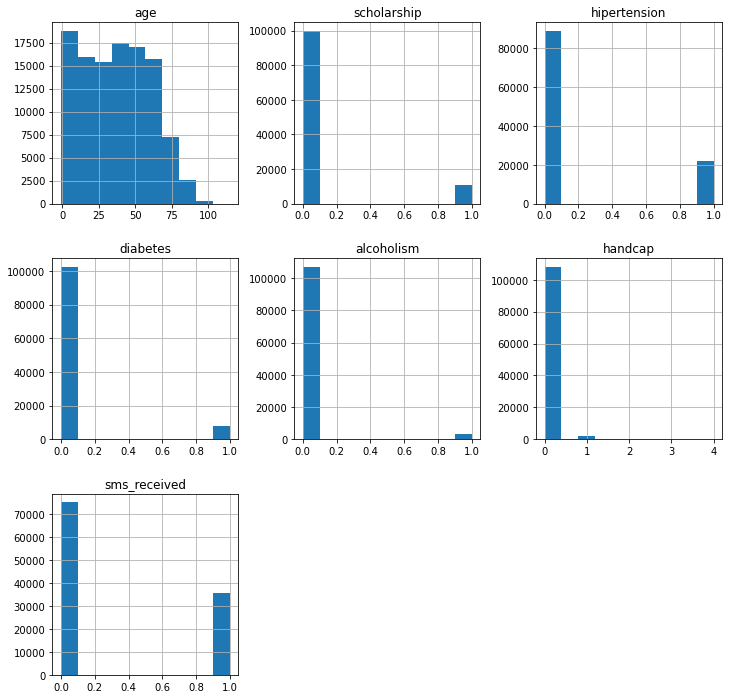

In [18]:
df.hist(figsize=(12,12));

##### as we notice

- most of the patients <b>don't have chronic disease</b>.

- <b>Hypertension</b> is the highest chronic disease.

- patients with <b>handcap</b> shows the least.

- Patients who received SMS, <b>are around half the paients</b> who didn't receive SMS.

- Patients who missed thier appointment <b>are about quarter of the patients attended</b>.

- patients who <b>didn't enroll</b> in <b>brazilllian welfare program</b> is higher than the people who <b>enrolled</b>.

### Asking Questions:

#### 1.what is the ratio between the patient who showed up and those who didn't?

In [19]:
#separating the patient who actually showed up and the patients who didn't
showed_up= df['no_show']== 'No'
didnot_show_up= df['no_show']=='Yes'

In [20]:
df[showed_up].count()

gender           88208
age              88208
neighbourhood    88208
scholarship      88208
hipertension     88208
diabetes         88208
alcoholism       88208
handcap          88208
sms_received     88208
no_show          88208
dtype: int64

In [21]:
df[didnot_show_up].count()

gender           22319
age              22319
neighbourhood    22319
scholarship      22319
hipertension     22319
diabetes         22319
alcoholism       22319
handcap          22319
sms_received     22319
no_show          22319
dtype: int64

##### from the previous outputs we noticed that patients who missied thier appointment are 25.30% from those who attended

#### 2.Is sending an sms made a progress for showing up on the appointments?

In [22]:
df[showed_up].mean()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_7068/740121304.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[showed_up].mean()


age             37.790064
scholarship      0.093903
hipertension     0.204392
diabetes         0.073837
alcoholism       0.030417
handcap          0.022742
sms_received     0.291334
dtype: float64

In [23]:
df[didnot_show_up].mean()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_7068/1738069323.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[didnot_show_up].mean()


age             34.317667
scholarship      0.115507
hipertension     0.169004
diabetes         0.064071
alcoholism       0.030333
handcap          0.020297
sms_received     0.438371
dtype: float64

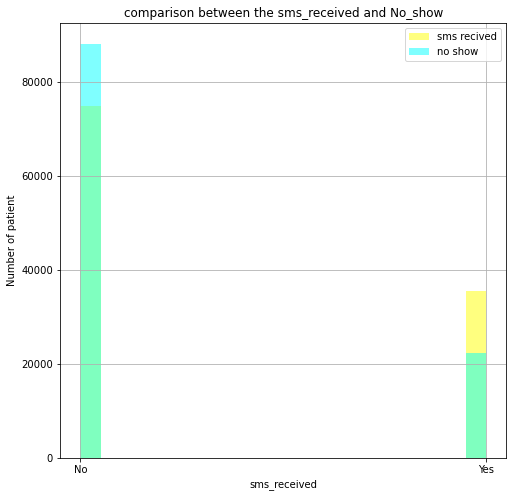

In [24]:
df.sms_received.hist(alpha=0.5, bins=20, figsize=(8,8),color='yellow', label='sms recived')
df.no_show.hist(alpha=0.5, bins=20, figsize=(8,8),color='cyan', label='no show')
plt.title('comparison between the sms_received and No_show') 
plt.xlabel('sms_received') 
plt.ylabel('Number of patient') 
plt.legend(); 

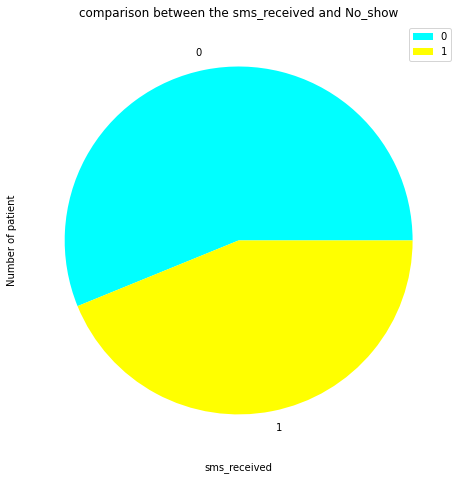

In [25]:
#comparing between patient who recived an sms and didn\'t show up
plt.figure(figsize=[10 , 8])
df.sms_received[didnot_show_up].value_counts().plot(kind='pie',colors=["cyan","yellow"],label ='patient who recived an sms and didn\'t show up')
plt.title('comparison between the sms_received and No_show') 
plt.xlabel('sms_received') 
plt.ylabel('Number of patient') 
plt.legend(); 

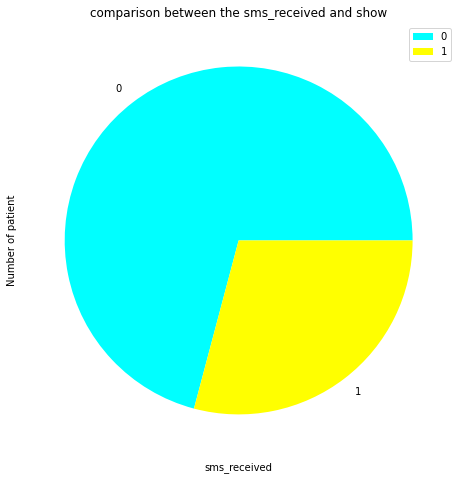

In [26]:
#comparing between patient who recived an sms and didn\'t show up
plt.figure(figsize=[10 , 8])
df.sms_received[showed_up].value_counts().plot(kind='pie',colors=["cyan","yellow"],label ='patient who recived an sms and showed up')
plt.title('comparison between the sms_received and show') 
plt.xlabel('sms_received') 
plt.ylabel('Number of patient') 
plt.legend(); 

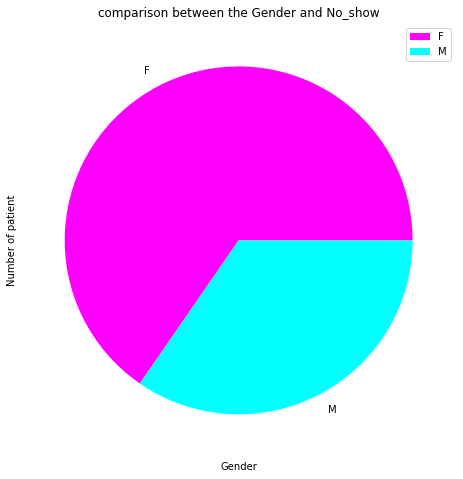

In [27]:
#comparing between patients who didn't show up in both genders
plt.figure(figsize=[10 , 8])
df.gender[didnot_show_up].value_counts().plot(kind = 'pie', colors= ["magenta", "cyan"] , label = 'patient who didn\'t show up')
plt.title('comparison between the Gender and No_show') 
plt.xlabel('Gender') 
plt.ylabel('Number of patient') 
plt.legend(); 

- as we notice the mean with the last 2 line codes we can compare between <b>patient who showed up and patients who didn't showed up by the mean</b> of each value such as thier mean age and the mean for reciving an sms
- the mean of sending sms and showing up is <b>less than</b> the mean for sending an sms and not showing up
##### this means that sending a verification sms to the patients didn't effect positivly on showing up to thier appointments

#### 3. Is there a correlation between the neighbourhood of the hospital and showing up on thier appointments?

In [28]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [29]:
#saperating the patient who showed up and didn't show up by the location of the hospital/neighbourhood
df.neighbourhood[showed_up].value_counts()

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [30]:
df.neighbourhood[didnot_show_up].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

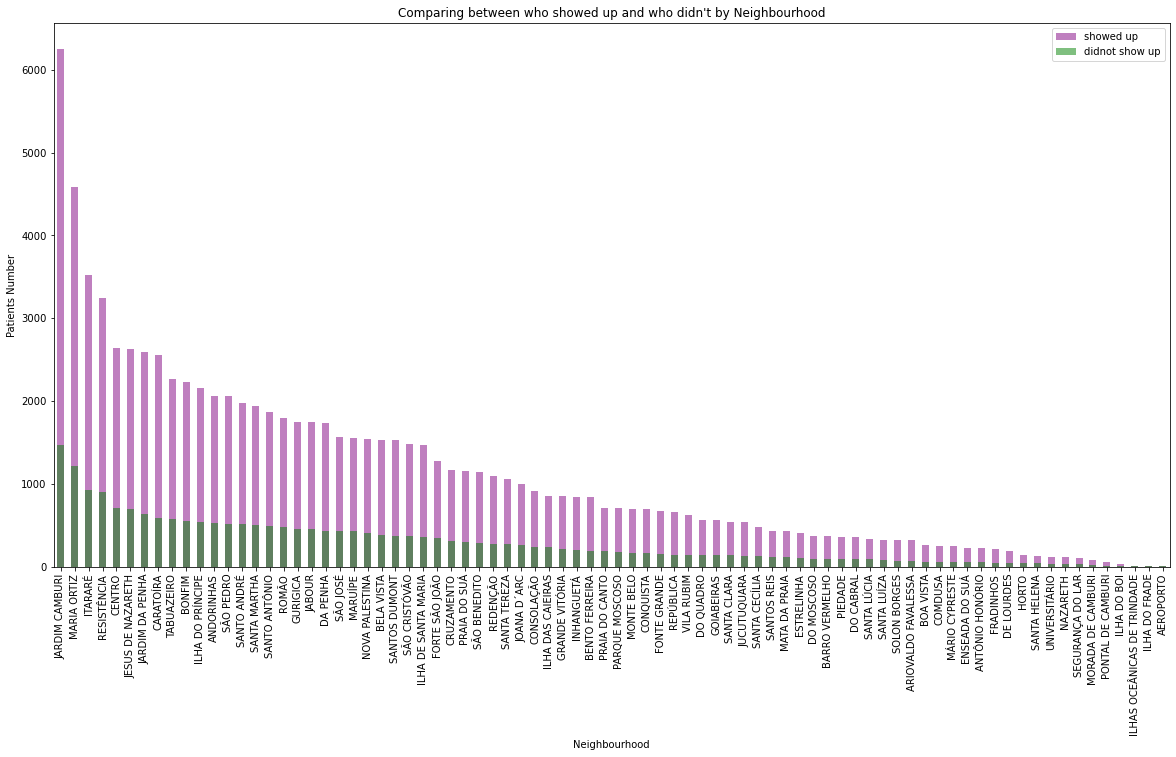

In [31]:
#analyzing according to the neighbourhood and number of patients
plt.figure(figsize=(20,10))
df.neighbourhood[showed_up].value_counts().plot(kind='bar', alpha=0.5, color='purple', label='showed up ')
df.neighbourhood[didnot_show_up].value_counts().plot(kind='bar', alpha=0.5, color='green', label='didnot show up')
plt.title('Comparing between who showed up and who didn\'t by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number')
plt.legend();

- it seems that the location of the hospital strongly affects on patients showing up on thier appointments

#### 4.Does females happens to show up on  thier appointments more than males?

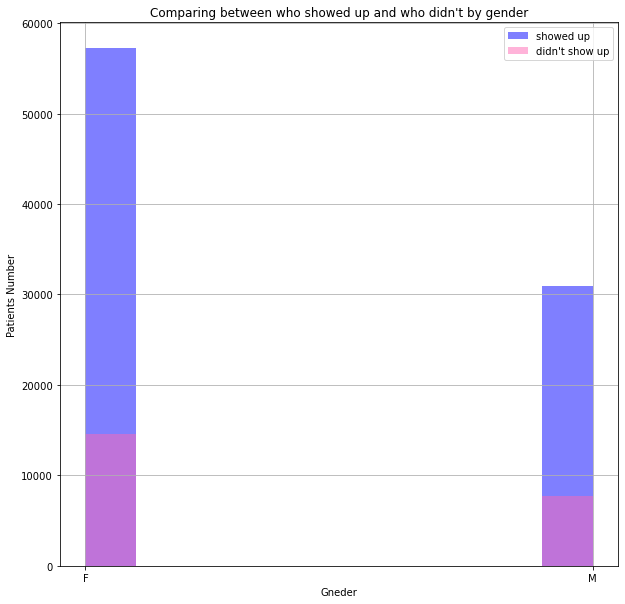

In [32]:
#comparing according to gender who showed up
plt.figure(figsize=(10,10))
df.gender[showed_up].hist(alpha=0.5, color='blue', label='showed up ')
df.gender[didnot_show_up].hist(alpha=0.5, color='hotpink' ,label ='didn\'t show up')
plt.title('Comparing between who showed up and who didn\'t by gender')
plt.xlabel('Gneder')
plt.ylabel('Patients Number')
plt.legend();

In [33]:
df.gender[showed_up].value_counts()

F    57246
M    30962
Name: gender, dtype: int64

In [34]:
df.gender[didnot_show_up].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

- as we can see that in general females are more than males and females showed up more than males 

#### 5.Does the age matter on showing up?

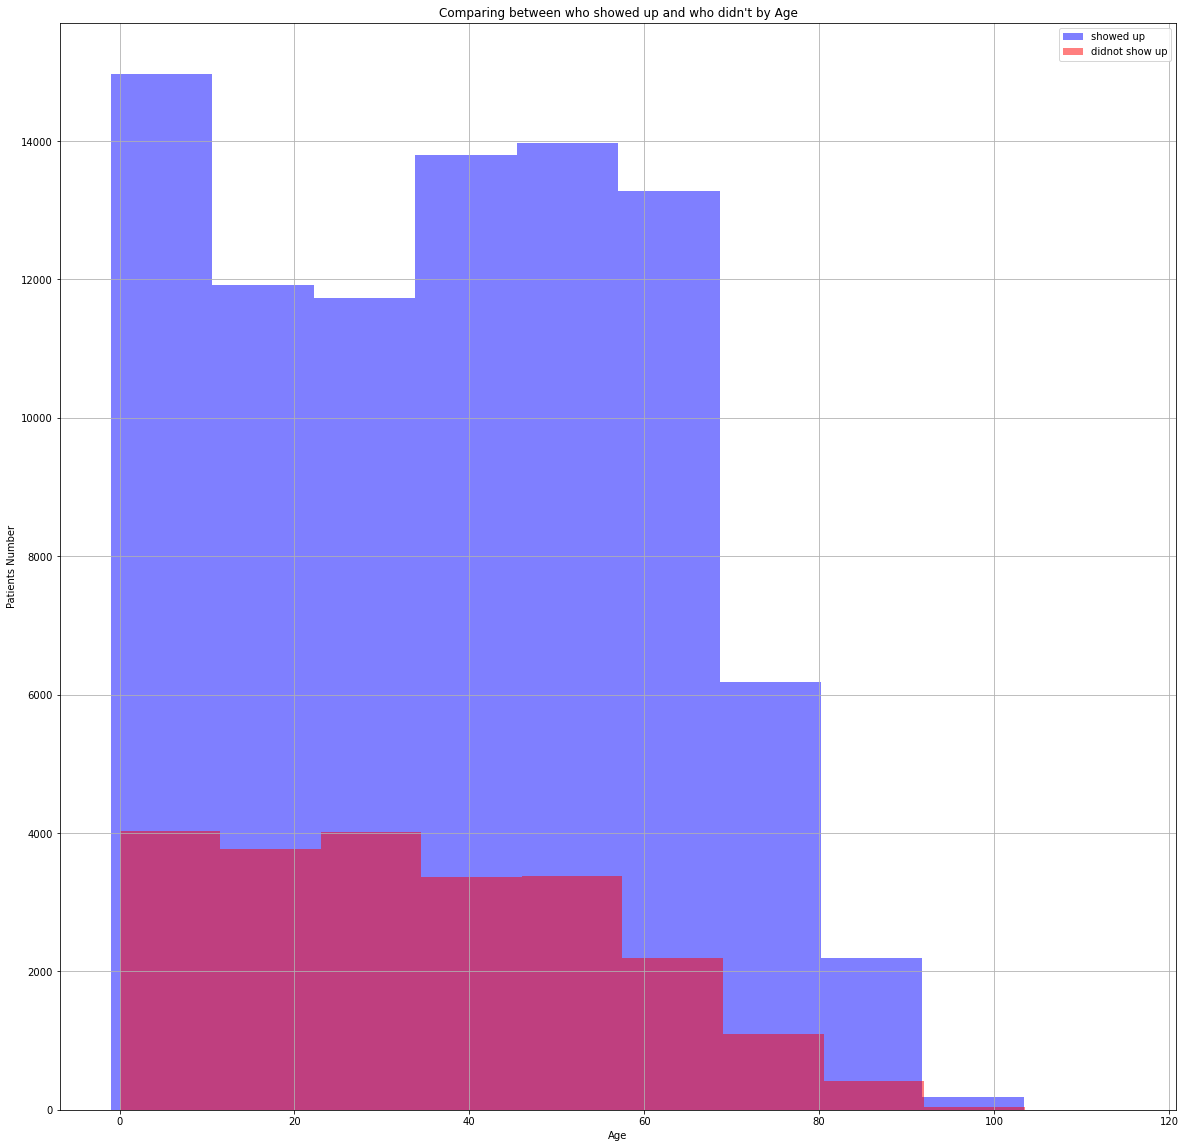

In [35]:
plt.figure(figsize=(20,20))
df.age[showed_up].hist(alpha=0.5,color='blue', label='showed up ')
df.age[didnot_show_up].hist(alpha=0.5,color='red', label='didnot show up')
plt.title('Comparing between who showed up and who didn\'t by Age')
plt.xlabel('Age')
plt.ylabel('Patients Number')
plt.legend();

##### -  ages from 0-10 are most showing up than older patients
##### -  the least showing up is from 65 to above 

#### 6.Is enrolling in brazilllian welfare program has raised number of patients who showed up?

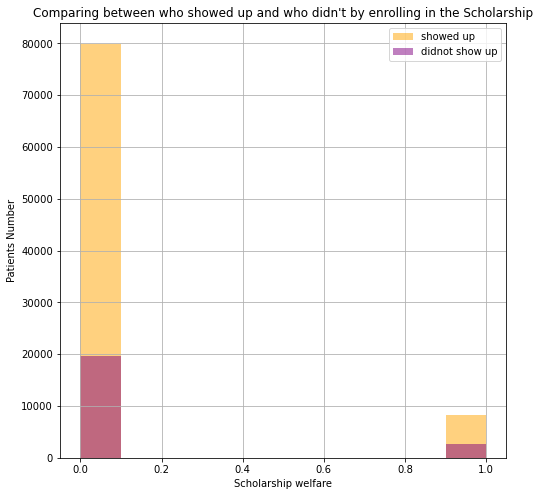

In [36]:
plt.figure(figsize=(8,8))
df.scholarship[showed_up].hist(alpha=0.5,color='orange', label='showed up')
df.scholarship[didnot_show_up].hist(alpha=0.5,color='purple', label='didnot show up')
plt.title('Comparing between who showed up and who didn\'t by enrolling in the Scholarship')
plt.xlabel('Scholarship welfare')
plt.ylabel('Patients Number')
plt.legend();

- as we can see that patients who didn't enroll in brazilllian welfare program is higher than the people who enrolled and people who showed up from the unenrolling is higher than the people who showed up with enrollment <b>this should be an indicator for reversing the brazillian welfare scholarship program</b>

#### 7.Is having a chronic diseases (Hipertension,Diabetes and handcap) affect on not showing up on the appointments?

Text(0, 0.5, 'Patients Number')

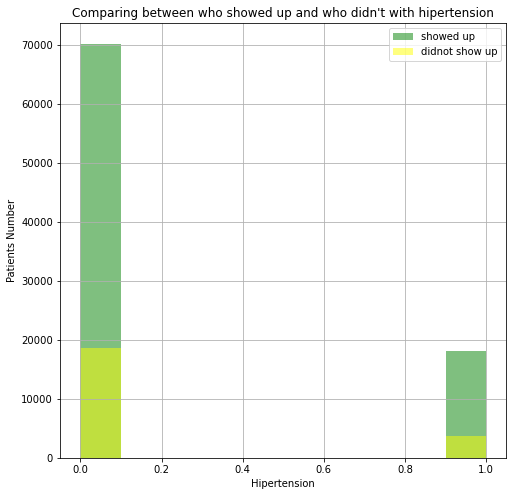

In [37]:
#comparing between pople who showed up and those who didn't show up with hipertension
plt.figure(figsize=(8,8))
df.hipertension[showed_up].hist(alpha=0.5, color='green', label='showed up')
df.hipertension[didnot_show_up].hist(alpha=0.5,color='yellow', label='didnot show up')
plt.legend();
plt.title('Comparing between who showed up and who didn\'t with hipertension')
plt.xlabel('Hipertension')
plt.ylabel('Patients Number')


Text(0, 0.5, 'Patients Number')

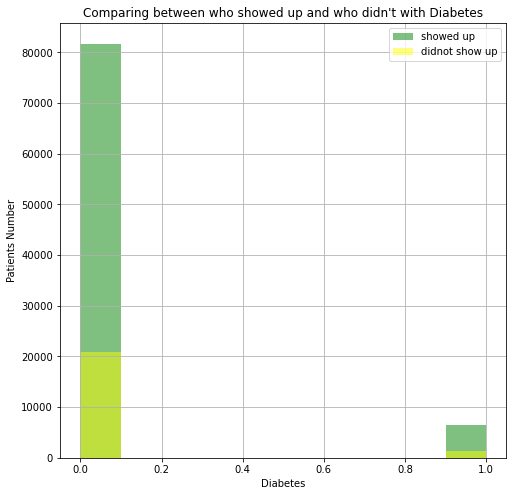

In [38]:
#comparing between pople who showed up and those who didn't show up with diabetes
plt.figure(figsize=(8,8))
df.diabetes[showed_up].hist(alpha=0.5, color='green', label='showed up')
df.diabetes[didnot_show_up].hist(alpha=0.5,color='yellow', label='didnot show up')
plt.legend();
plt.title('Comparing between who showed up and who didn\'t with Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patients Number')

Text(0, 0.5, 'Patients Number')

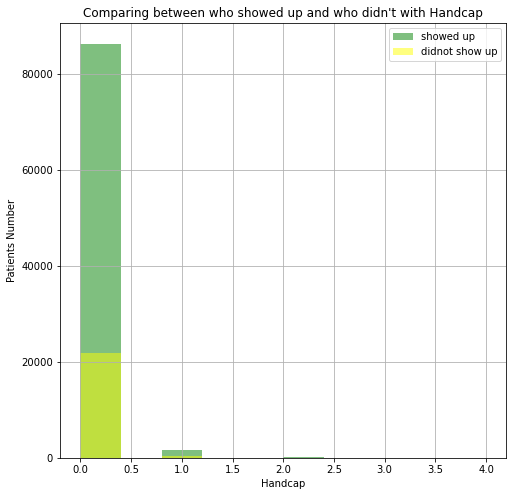

In [39]:
#comparing between pople who showed up and those who didn't show up with handcap
plt.figure(figsize=(8,8))
df.handcap[showed_up].hist(alpha=0.5, color='green', label='showed up')
df.handcap[didnot_show_up].hist(alpha=0.5,color='yellow', label='didnot show up')
plt.legend();
plt.title('Comparing between who showed up and who didn\'t with Handcap')
plt.xlabel('Handcap')
plt.ylabel('Patients Number')

#### 8.Is being an alcoholic affects the missed appointments percentage?

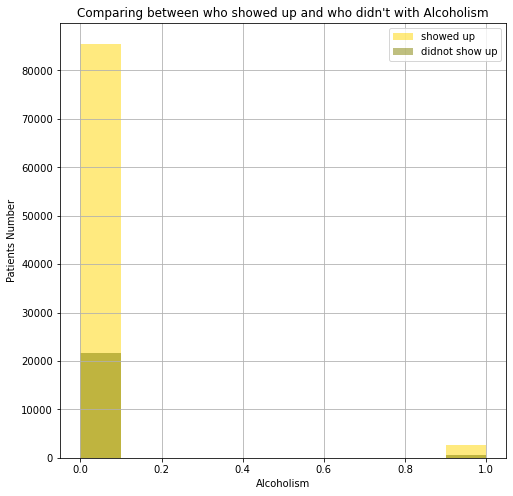

In [40]:
plt.figure(figsize=(8,8))
df.alcoholism[showed_up].hist(alpha=0.5,color='gold', label='showed up')
df.alcoholism[didnot_show_up].hist(alpha=0.5,color='olive', label='didnot show up')
plt.title('Comparing between who showed up and who didn\'t with Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Patients Number')
plt.legend();

##### as we can see that been an alchoholic did'nt prevent patients for showing up

<a id='conclusions'></a>
## Conclusions

- most of the patients <b>don't have </b> chronic disease.

- sending an sms to the patients <b>didn't made much progress</b> for showing up

- people who showed up are <b>3 quarters more than</b> the patients who didn't show up, which means that the hospital is making a progress but this analysis should be an <b>indicator for what steps should be made for better outcome</b>.

- patients who didn't enroll in brazilllian welfare program is higher than the people who enrolled,which means that the <b>welfare didn't make much progress or didn't grap people attention and this should be considerd</b>.

- showing up in alchoholic patients is <b>more than</b>. the not showing percentage with a <b>huge difference! this should be noticable</b>.


<a id='limitation'></a>
## limitation
- <b> No clear </b> chronic correlation between chronic disease and show up and not showing up

- Couldn't dig dipper in showing up and not showing up by <b>date or years</b> to see the progress

- Couldn't identify the welfare program whether it's a discount or what to get to know better it's effect on showing or no shwoing up for the patients

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1